# Project 1: House Price Prediction using Regression

**Name:** Devashish Mahato  
**Roll No:** 25/DSBA-T12/OCT-7541 

**Program:**  Data Science and Business Analytics /DA(October 2025 Batch)

## Objective
To predict house prices based on property features using regression models.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
import os

os.getcwd()


'c:\\Users\\DEVASHISH\\OneDrive\\Documents\\Devashish_Mahato_Major_Project'

In [3]:
import os

os.chdir(r"C:\Users\DEVASHISH\OneDrive\Documents\Devashish_Mahato_Major_Project")



In [4]:
os.listdir()



['Bengaluru_House_Data (1).csv',
 'loan.csv',
 'Project 1_report.pdf',
 'Project1.ipynb',
 'Project2.ipynb']

In [5]:
import pandas as pd

df = pd.read_csv("Bengaluru_House_Data (1).csv")
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape


(13320, 9)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Data Cleaning and Preprocessing


In [8]:
# Drop unnecessary columns
df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1, inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

df.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Feature Engineering

In [9]:
# Convert size (BHK)
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.drop('size', axis=1, inplace=True)

# Convert total_sqft ranges to single value
def convert_sqft(x):
    try:
        if '-' in x:
            a, b = x.split('-')
            return (float(a) + float(b)) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df.dropna(inplace=True)

# Price per sqft
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

df.head()


,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


## Exploratory Data Analysis (EDA)


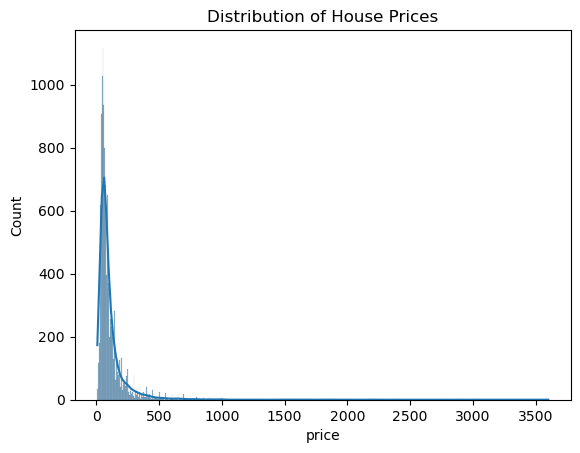

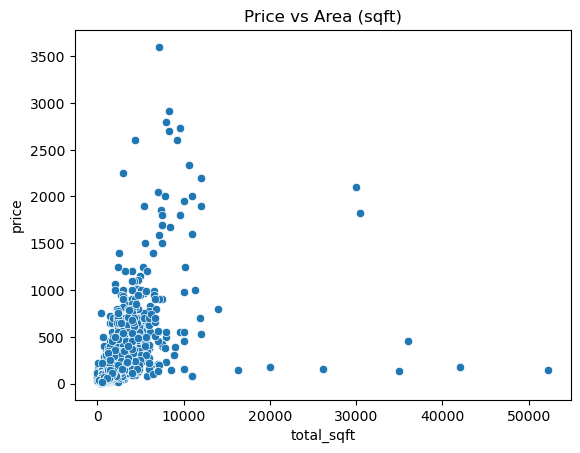

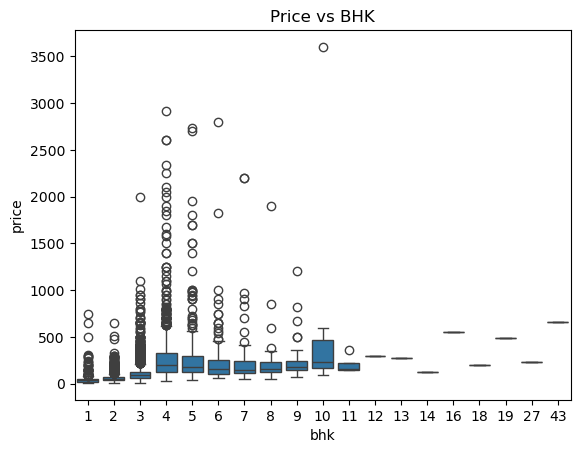

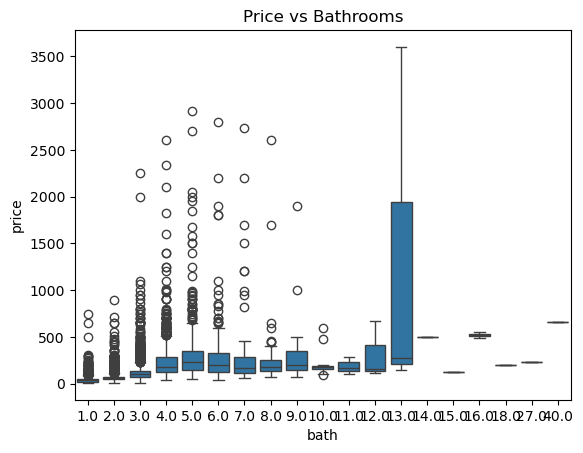

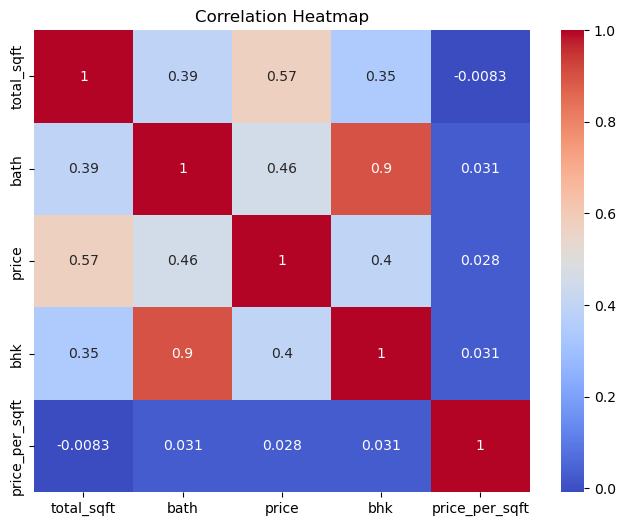

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Price distribution
sns.histplot(df['price'], kde=True)
plt.title("Distribution of House Prices")
plt.show()

# 2. Price vs Total Square Feet
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title("Price vs Area (sqft)")
plt.show()

# 3. Price vs BHK
sns.boxplot(x='bhk', y='price', data=df)
plt.title("Price vs BHK")
plt.show()

# 4. Price vs Bathrooms
sns.boxplot(x='bath', y='price', data=df)
plt.title("Price vs Bathrooms")
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Model Building


In [11]:
# One-hot encoding for categorical column
df_model = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_model.drop('price', axis=1)
y = df_model['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "RMSE": [
        evaluate(y_test, lr_pred)[0],
        evaluate(y_test, dt_pred)[0],
        evaluate(y_test, rf_pred)[0]
    ],
    "MAE": [
        evaluate(y_test, lr_pred)[1],
        evaluate(y_test, dt_pred)[1],
        evaluate(y_test, rf_pred)[1]
    ],
    "R2 Score": [
        evaluate(y_test, lr_pred)[2],
        evaluate(y_test, dt_pred)[2],
        evaluate(y_test, rf_pred)[2]
    ]
})

results


,Model,RMSE,MAE,R2 Score
0,Linear Regression,86.339471,41.246331,0.580073
1,Decision Tree,30.228270,4.160773,0.948527
2,Random Forest,22.160427,2.495243,0.972336


## Conclusion

Among all the regression models used, the Random Forest Regressor performed the best
with the lowest error values and the highest R² score. This indicates that ensemble
methods are more effective in capturing complex relationships in house price data.

This model can be used to assist buyers and sellers in estimating property prices
based on key features such as area, location, and number of rooms.
